# Installing libraries

In [1]:
# Ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
!pip install plotly

In [ ]:
!pip install plotly scanpy

In [4]:
import plotly.io as pio
pio.renderers.default='notebook'

In [5]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
from numpy import unique

import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import plotly.express as px

If you are using this notebook in Google Colab, please uncomment the next cell and replace 'omics_aging' with the name of your directory in Google Drive

In [ ]:
# import sys
# from google.colab import drive
# drive.mount('/content/drive')
# os.listdir('/content/drive')
# directory_path = '/content/drive/MyDrive/bioinf_inst/data/CpG/processed/'
# scripts_path = '/content/drive/MyDrive/bioinf_inst/scripts/CpG/'
# print(os.listdir(directory_path))
# sys.path.append(directory_path)
# sys.path.append(scripts_path)

Mounted at /content/drive
['one_dataset_pipeline.ipynb', 'join_annot.ipynb', 'OmicDownlload (1).ipynb', 'filterd_CpG_leiko_corrected_12032024.csv', 'metaannot.csv', 'data', 'Clustering_results.ipynb', 'Multiomics_all_CpG_data.pptx', 'detect_main_genes.ipynb']


Otherwise uncomment the next cell

In [ ]:
# directory_path = './data/CpG/processed'

# Read all preprocessed metacohort data

In [7]:
df = pd.read_csv(os.path.join(directory_path, 'filterd_CpG_leiko_corrected_12032024.csv'))
df = df.drop_duplicates().set_index('index')
df.head()

,cg00008647,cg00295572,cg00346208,cg00448707,cg00563824,cg00664416,cg00764612,cg00908766,cg00951395,cg01101873,...,cg18855195,cg19543968,cg19558972,cg19713460,cg19800640,cg19855470,cg21401457,cg21445911,cg24435209,cg26169700
index,,,,,,,,,,,,,,,,,,,,,
GSM1051525,0.224142,0.167473,0.252797,0.767779,0.292238,0.289371,0.375905,0.522142,0.411905,0.453685,...,0.557377,0.395075,0.243713,0.249575,0.858602,0.268208,0.602051,0.855962,0.592358,0.825162
GSM1051526,0.219361,0.156888,0.173419,0.753855,0.321734,0.314705,0.330767,0.625400,0.466970,0.561958,...,0.591798,0.400635,0.257338,0.242520,0.851584,0.264483,0.510362,0.852624,0.594299,0.880614
GSM1051527,0.137153,0.060801,0.135405,0.832557,0.106155,0.186398,0.252518,0.531337,0.466123,0.528114,...,0.395909,0.318659,0.196490,0.121846,0.886259,0.215812,0.690511,0.837179,0.656277,0.894600
GSM1051528,0.191287,0.153258,0.181326,0.805664,0.255982,0.281080,0.345738,0.499670,0.384548,0.516283,...,0.440596,0.427026,0.256310,0.227496,0.886949,0.279397,0.573916,0.845085,0.540028,0.885426
GSM1051529,0.210777,0.127497,0.139660,0.689237,0.288889,0.233415,0.346164,0.710315,0.474954,0.559628,...,0.483105,0.372686,0.292122,0.243244,0.871077,0.260122,0.555962,0.493836,0.540540,0.859882


In [8]:
df_all_annot = pd.read_csv(os.path.join(directory_path, 'metaannot.csv'))
df_all_annot = df_all_annot.drop_duplicates().set_index('GSM')
df_all_annot.head()

,cell type,disease state,subject,age,gender,smoking status,cohort,cohort_type,age at menarche,cancer type (icd-10),...,rs718314,rs7481311,rs7498665,rs7647305,rs7832552,rs824931,rs887912,rs984222,rs9939609,family
GSM,,,,,,,,,,,,,,,,,,,,,
GSM1051525,PBL,rheumatoid arthritis,Patient,67.0,f,current,GSE42861_annot.csv,leiko,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1051526,PBL,rheumatoid arthritis,Patient,49.0,f,current,GSE42861_annot.csv,leiko,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1051527,PBL,rheumatoid arthritis,Patient,53.0,f,ex,GSE42861_annot.csv,leiko,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1051528,PBL,rheumatoid arthritis,Patient,62.0,f,current,GSE42861_annot.csv,leiko,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1051529,PBL,rheumatoid arthritis,Patient,33.0,f,never,GSE42861_annot.csv,leiko,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keep only PBMC cohorts

In [9]:
df_leiko=df_all_annot[df_all_annot['cohort_type']=='leiko']

Plot age distribution for the metacohort

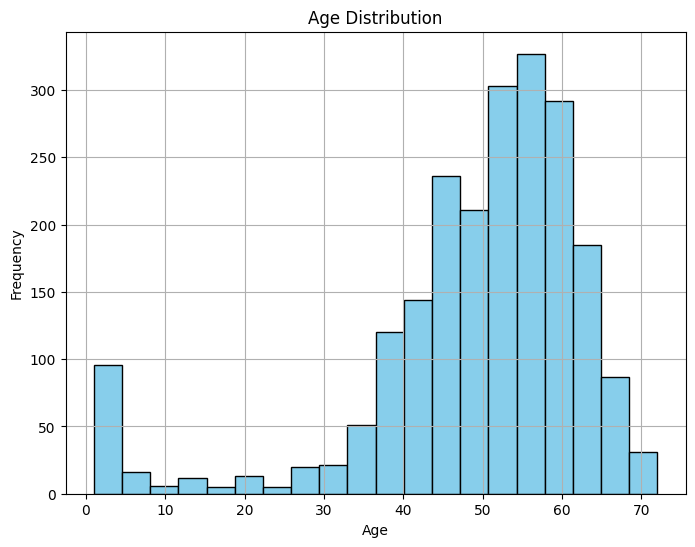

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df_leiko['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Check one CpG distribution

In [ ]:
df['cg00295572']

index
GSM1051525    0.167473
GSM1051526    0.156888
GSM1051527    0.060801
GSM1051528    0.153258
GSM1051529    0.127497
                ...   
GSM1236374    0.139527
GSM1236375    0.137195
GSM1236376    0.127772
GSM1236377    0.097703
GSM1236378    0.153500
Name: cg00295572, Length: 1212, dtype: float64

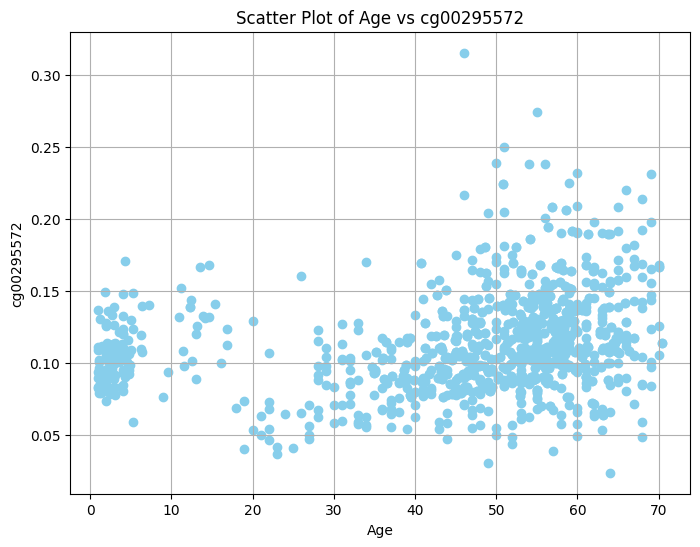

In [ ]:
subdf = df_all_annot[['age']].join(df['cg00295572'])
# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(subdf['age'], subdf['cg00295572'], color='skyblue')
plt.title('Scatter Plot of Age vs cg00295572')
plt.xlabel('Age')
plt.ylabel('cg00295572')
plt.grid(True)
plt.show()

# Whole PBMC analysis

In [ ]:
subdf_idx = df_all_annot.index

In [ ]:
idx_in_df = list(df.index)
dupls_in_df = list(set(n for n in idx_in_df if idx_in_df.count(n) > 1))
df.loc[dupls_in_df]

,cg00008647,cg00295572,cg00346208,cg00448707,cg00563824,cg00664416,cg00764612,cg00908766,cg00951395,cg01101873,...,cg18855195,cg19543968,cg19558972,cg19713460,cg19800640,cg19855470,cg21401457,cg21445911,cg24435209,cg26169700
index,,,,,,,,,,,,,,,,,,,,,
GSM1051754,0.122818,0.062420,0.082316,0.704523,0.184828,0.136800,0.252710,0.695340,0.323313,0.489348,...,0.246839,0.434571,0.426777,0.130065,0.875597,0.203478,0.564208,0.814656,0.576675,0.806371
GSM1051754,0.124610,0.056654,0.082812,0.711713,0.192771,0.143132,0.250921,0.689468,0.299247,0.499675,...,0.264578,0.418849,0.424798,0.128338,0.884602,0.199650,0.562350,0.816834,0.585800,0.794740
GSM1051984,0.255718,0.190501,0.207580,0.790361,0.290070,0.184965,0.371691,0.519628,0.403768,0.534902,...,0.459112,0.342351,0.448726,0.243308,0.864692,0.261133,0.687011,0.819377,0.626011,0.839465
GSM1051984,0.300905,0.208743,0.222716,0.770466,0.340866,0.203821,0.359091,0.532078,0.414305,0.526963,...,0.463667,0.326311,0.433611,0.251214,0.839599,0.267952,0.716560,0.819960,0.621274,0.833394


In [ ]:
# subdf_idx = subdf_idx.drop(dupls_in_df)
df_all_annot = df_all_annot.loc[subdf_idx]
df = df.loc[subdf_idx]
len(df) == len(df_all_annot)

In [ ]:
df = df.join(df_all_annot['age'])
df.columns

Index(['cg00008647', 'cg00295572', 'cg00346208', 'cg00448707', 'cg00563824',
       'cg00664416', 'cg00764612', 'cg00908766', 'cg00951395', 'cg01101873',
       ...
       'cg19543968', 'cg19558972', 'cg19713460', 'cg19800640', 'cg19855470',
       'cg21401457', 'cg21445911', 'cg24435209', 'cg26169700', 'age'],
      dtype='object', length=4457)

In [ ]:
df.shape

(3515, 4457)

## Make dataset with ages and mean values calculated as distribution peak
(kinda mode)

And this mode are calculcated as sliding window across 3 years

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from concurrent.futures import ProcessPoolExecutor

In [ ]:
# Function to compute peak values for a single CpG site
def compute_peak_values(cpg_site: str) -> List[float]:
    """
    Compute peak values for a single CpG site.

    Note: 'df' is declared as a global variable outside the function for the sake of facilitating multiprocessing.

    Parameters:
        cpg_site (str): CpG site identifier.

    Returns:
        List[float]: List of peak values for the specified CpG site.
    """
    peak_values = []
    for age in df['age'].unique():
        subset = df[df['age'] == age][cpg_site]
        density, bins = np.histogram(subset, bins=30, density=True)
        peaks, _ = find_peaks(density, height=0)
        if len(peaks) > 0:
            peak_values.append(bins[peaks[0]])
        else:
            peak_values.append(np.nan)
    return peak_values

In [ ]:
%%time

# Instantiate a ProcessPoolExecutor to expedite processing
with ProcessPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(compute_peak_values, cpg_site) for cpg_site in df.columns[:-1]]
    peak_values_all_cpg = [future.result() for future in futures]

peak_values_df = pd.DataFrame(peak_values_all_cpg, index=df.columns[:-1], columns=df['age'].unique()).T

In [ ]:
peak_values_df = peak_values_df.sort_index()
peak_values_df.head()

,cg00008647,cg00295572,cg00346208,cg00448707,cg00563824,cg00664416,cg00764612,cg00908766,cg00951395,cg01101873,...,cg18855195,cg19543968,cg19558972,cg19713460,cg19800640,cg19855470,cg21401457,cg21445911,cg24435209,cg26169700
1.000000,0.108154,0.089437,0.147150,0.710120,0.151313,0.212086,0.267615,0.628234,0.320082,0.531295,...,0.452649,0.372807,0.251165,0.162933,0.882422,0.213480,0.546229,0.841378,0.557274,0.834416
1.083333,0.143779,0.083461,0.133684,0.698195,0.177996,0.211499,0.262981,0.552602,0.326544,0.539185,...,0.452590,0.362316,0.253695,0.158679,0.662127,0.221272,0.544482,0.851175,0.505684,0.832397
1.166667,0.119253,0.054882,0.149779,0.724379,0.222509,0.219996,0.271514,0.727437,0.392743,0.522625,...,0.464880,0.361293,0.345555,0.204217,0.888022,0.223934,0.634218,0.846366,0.579635,0.857421
1.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.333333,0.126026,0.088067,NaN,NaN,0.175938,0.252062,0.273072,0.613185,0.373505,NaN,...,0.456687,0.361849,0.319683,0.179751,NaN,0.222645,NaN,0.846455,0.556692,0.833314


If you wish to save peak values, please uncomment the next cell

In [ ]:
# peak_values_df.to_csv(f'PBMC_peak_values.csv')

## Calculate correlation for CpGs

In [14]:
peak_values_df = pd.read_csv(os.path.join(directory_path, f'PBMC_peak_values.csv'), index_col=0)

In [15]:
%%time
corr_matrix = peak_values_df.corr()
corr_matrix.head()

CPU times: user 28.6 s, sys: 120 ms, total: 28.8 s
Wall time: 32.8 s


,cg00008647,cg00295572,cg00346208,cg00448707,cg00563824,cg00664416,cg00764612,cg00908766,cg00951395,cg01101873,...,cg18855195,cg19543968,cg19558972,cg19713460,cg19800640,cg19855470,cg21401457,cg21445911,cg24435209,cg26169700
cg00008647,1.000000,0.555423,0.586807,0.109522,0.504698,0.436740,0.618701,0.150282,0.249746,0.195203,...,0.298644,0.031790,0.258363,0.587643,0.032482,0.386449,0.244832,0.029874,0.144694,0.113162
cg00295572,0.555423,1.000000,0.606481,0.145404,0.471941,0.504810,0.657225,0.121181,0.268709,0.158935,...,0.254398,0.011820,0.265697,0.560278,0.094478,0.381145,0.194667,0.063433,0.183774,0.153642
cg00346208,0.586807,0.606481,1.000000,0.156589,0.562193,0.512728,0.707114,0.167346,0.309521,0.163130,...,0.305881,-0.023559,0.231018,0.588264,0.086327,0.401725,0.260160,0.042687,0.190691,0.168474
cg00448707,0.109522,0.145404,0.156589,1.000000,0.184293,0.209361,0.253816,0.171436,0.232612,0.221050,...,0.198866,0.156975,0.164856,0.124497,0.134774,0.151417,0.210694,0.059708,0.222762,0.270172
cg00563824,0.504698,0.471941,0.562193,0.184293,1.000000,0.481208,0.584744,0.182556,0.278106,0.239624,...,0.291224,0.043049,0.298639,0.473301,0.132088,0.303496,0.297107,0.024546,0.136213,0.265326


## Calculate optimal clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
%%time
km_scores= []

for i in range(2,15):
    km = KMeans(n_clusters=i, random_state=0).fit(corr_matrix);
    preds = km.predict(corr_matrix);
    km_scores.append(-km.score(corr_matrix))

CPU times: user 8min 8s, sys: 15.2 s, total: 8min 23s
Wall time: 5min 16s


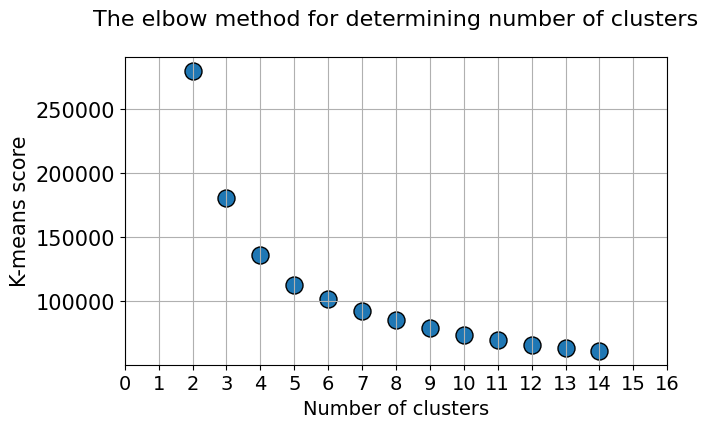

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(0,17)],fontsize=14)
plt.yticks(fontsize=15)
plt.show();

Although the elbow method suggests choosing 5 clusters, for our specific analysis focused on identifying the most correlated CpGs among individuals aged 24, 37, and 60 years old, I have opted to proceed with 8 clusters for further investigation

## Make Gaussian Mixture clusterization

In this step, I exclusively utilize Gaussian Mixture clustering, owing to the analysis of data from a single cohort (refer to the 'different_clustering_for_one_dataset.ipnyb' notebook).

In [16]:
from plot_clustering_results import plot_umap_and_tsne, plot_pca, cut_clustermap_tree, plot_top_trends_for_each_cluster

In [17]:
from sklearn.mixture import GaussianMixture

In [18]:
%%time
gmm = GaussianMixture(n_components=8, random_state=42)
gmm.covariance_type = 'diag'
# gmm.init_params = 'kmeans'
gmm.fit(corr_matrix)
cluster_labels_gmm = gmm.predict(corr_matrix)
cluster_labels_gmm

CPU times: user 18.2 s, sys: 10.2 s, total: 28.4 s
Wall time: 21.5 s


array([0, 0, 0, ..., 6, 4, 4])

In [19]:
x_for_pca = peak_values_df.T.fillna(0)
pca = PCA(n_components=2)
components = pca.fit_transform(x_for_pca)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92061874 0.00594654]
[253.65632315  20.3862796 ]


In [20]:
components_df = pd.DataFrame(components, columns=['x', 'y'])

In [21]:
x_for_pca.head()

,1.000000,1.083333,1.166667,1.250000,1.333333,1.416667,1.500000,1.583333,1.833333,1.916667,...,65.854000,66.000000,66.319000,67.000000,68.000000,69.000000,70.000000,70.064000,70.393000,NaN
cg00008647,0.108154,0.143779,0.119253,0.0,0.126026,0.175645,0.0,0.0,0.183051,0.0,...,0.188802,0.154234,0.181555,0.152444,0.114864,0.151377,0.164362,0.240007,0.169280,0.0
cg00295572,0.089437,0.083461,0.054882,0.0,0.088067,0.076267,0.0,0.0,0.148958,0.0,...,0.141337,0.086097,0.075183,0.084506,0.054849,0.082160,0.103892,0.133470,0.080152,0.0
cg00346208,0.147150,0.133684,0.149779,0.0,0.000000,0.168664,0.0,0.0,0.163403,0.0,...,0.211812,0.152829,0.161284,0.149257,0.096198,0.122990,0.134486,0.268127,0.227548,0.0
cg00448707,0.710120,0.698195,0.724379,0.0,0.000000,0.722834,0.0,0.0,0.690584,0.0,...,0.804538,0.645313,0.754818,0.614243,0.617884,0.603907,0.767339,0.747514,0.747477,0.0
cg00563824,0.151313,0.177996,0.222509,0.0,0.175938,0.189820,0.0,0.0,0.181766,0.0,...,0.281356,0.184423,0.152282,0.165227,0.143382,0.133800,0.220735,0.318447,0.177297,0.0


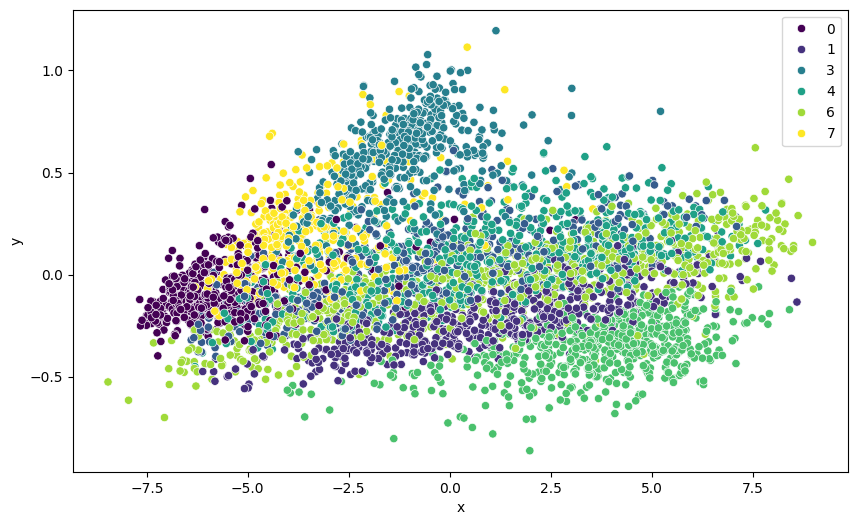

In [22]:
plot_pca(cluster_labels_gmm, components_df)

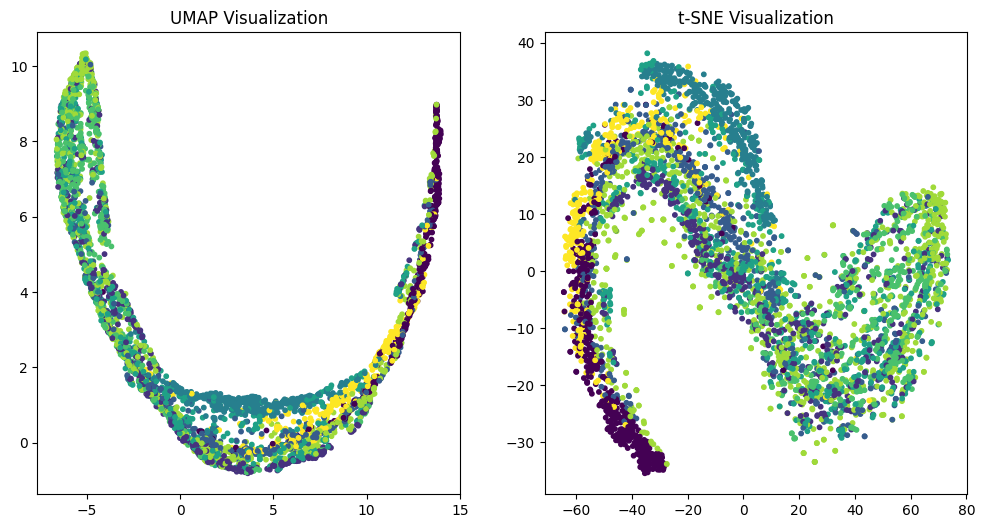

In [23]:
plot_umap_and_tsne(cluster_labels_gmm, x_for_pca)

Correct the data and then ensure that ages are incremented by 1 in each row

In [24]:
# peak_values_df.index = peak_values_df.index.round()
peak_values_df = peak_values_df[~peak_values_df.index.isin([np.nan, np.inf, -np.inf])]
peak_values_df.index = peak_values_df.index.astype(int)
# Group by the rounded age index and calculate the mean for each group
grouped_mean = peak_values_df.groupby(peak_values_df.index).mean()


grouped_mean


,cg00008647,cg00295572,cg00346208,cg00448707,cg00563824,cg00664416,cg00764612,cg00908766,cg00951395,cg01101873,...,cg18855195,cg19543968,cg19558972,cg19713460,cg19800640,cg19855470,cg21401457,cg21445911,cg24435209,cg26169700
1,0.142651,0.090179,0.152536,0.709222,0.183224,0.230960,0.278993,0.626871,0.361373,0.527580,...,0.452035,0.369036,0.281921,0.203617,0.839915,0.232094,0.570487,0.843914,0.564064,0.838368
2,0.164356,0.093938,0.148583,0.717843,0.215201,0.222130,0.291848,0.651192,0.348352,0.532402,...,0.463319,0.369573,0.285399,0.214094,0.863047,0.238011,0.570809,0.844426,0.574743,0.852213
3,0.158577,0.094252,0.146086,0.729551,0.213541,0.219806,0.291854,0.616299,0.364441,0.522647,...,0.447641,0.360867,0.282848,0.203432,0.714329,0.222420,0.512679,0.840526,0.565618,0.839834
4,0.162130,0.095583,0.174032,0.723731,0.191491,0.215864,0.299227,0.621410,0.375271,0.509403,...,0.451213,0.365245,0.249363,0.207516,0.774937,0.232766,0.577896,0.848106,0.589996,0.844828
5,0.189082,0.109096,0.158058,0.729331,0.189944,0.231346,0.321914,0.736866,0.398367,0.509816,...,0.423288,0.363856,0.261764,0.231177,0.896658,0.266081,0.480448,0.835882,0.551596,0.826452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.167894,0.080640,0.157057,0.700066,0.168353,0.189029,0.290005,0.561092,0.273368,0.446912,...,0.413310,0.279342,0.232603,0.178522,0.846405,0.229694,0.478116,0.667163,0.498948,0.781973
67,0.152444,0.084506,0.149257,0.614243,0.165227,0.195905,0.284598,0.538954,0.213082,0.427339,...,0.334334,0.247696,0.231480,0.185493,0.849753,0.228704,0.476210,0.850477,0.443729,0.732828
68,0.114864,0.054849,0.096198,0.617884,0.143382,0.137870,0.238302,0.422781,0.254600,0.397494,...,0.304510,0.282061,0.207216,0.168400,0.417922,0.234547,0.319271,0.817311,0.392363,0.642704
69,0.151377,0.082160,0.122990,0.603907,0.133800,0.143837,0.225441,0.331101,0.162689,0.350102,...,0.332634,0.257839,0.200965,0.162196,0.853801,0.228762,0.381060,0.831822,0.415543,0.670008


In [25]:
grouped_mean = grouped_mean.fillna(grouped_mean.shift(axis=0))

Unfortunately, we lack sufficient data for early ages. To address this, we will fill in the missing data with the mean values from neighboring ages

In [26]:
grouped_mean.loc[8] = (grouped_mean.loc[7]+grouped_mean.loc[9])/2
grouped_mean.loc[10] = (grouped_mean.loc[9]+grouped_mean.loc[11])/2
grouped_mean.loc[17] = (grouped_mean.loc[16]+grouped_mean.loc[18])/2

In [27]:
df_trans = grouped_mean.T

df_trans.columns = df_trans.columns.astype(int)
window_size = 2
mean_window_df = pd.DataFrame(index=df_trans.T.columns)

# Loop through each age. Before using this cell, verify that all ages exist with a step of 1.
for age in df_trans.columns:
    age_range = list(range(age - window_size, age + window_size + 1))
    age_range = [a for a in age_range if a >= df_trans.columns.min() and a <= df_trans.columns.max()]
    mean_values = df_trans[age_range].mean(axis=1)
    mean_window_df[age] = mean_values

# DataFrame with ages as rows and CpGs as columns
mean_window_df = mean_window_df.T
mean_window_df.head()

,cg00008647,cg00295572,cg00346208,cg00448707,cg00563824,cg00664416,cg00764612,cg00908766,cg00951395,cg01101873,...,cg18855195,cg19543968,cg19558972,cg19713460,cg19800640,cg19855470,cg21401457,cg21445911,cg24435209,cg26169700
1,0.155195,0.092790,0.149069,0.718872,0.203989,0.224299,0.287565,0.631454,0.358055,0.527543,...,0.454332,0.366492,0.283389,0.207048,0.805764,0.230842,0.551325,0.842955,0.568141,0.843472
2,0.156929,0.093488,0.155309,0.720087,0.200864,0.222190,0.290481,0.628943,0.362359,0.523008,...,0.453552,0.366180,0.274883,0.207165,0.798057,0.231323,0.557968,0.844243,0.573605,0.843811
3,0.163359,0.096610,0.155859,0.721936,0.198680,0.224021,0.296767,0.650528,0.369561,0.520369,...,0.447499,0.365716,0.272259,0.211967,0.817777,0.238275,0.542464,0.842571,0.569203,0.840339
4,0.172645,0.100393,0.156964,0.725958,0.200024,0.224099,0.305351,0.672527,0.376959,0.516816,...,0.441750,0.364680,0.268227,0.217479,0.829126,0.245072,0.524456,0.840964,0.566710,0.837956
5,0.206621,0.109685,0.163581,0.736222,0.216088,0.222164,0.314265,0.645857,0.369118,0.514172,...,0.440481,0.358571,0.282826,0.228609,0.837165,0.245760,0.540986,0.844039,0.571811,0.837787


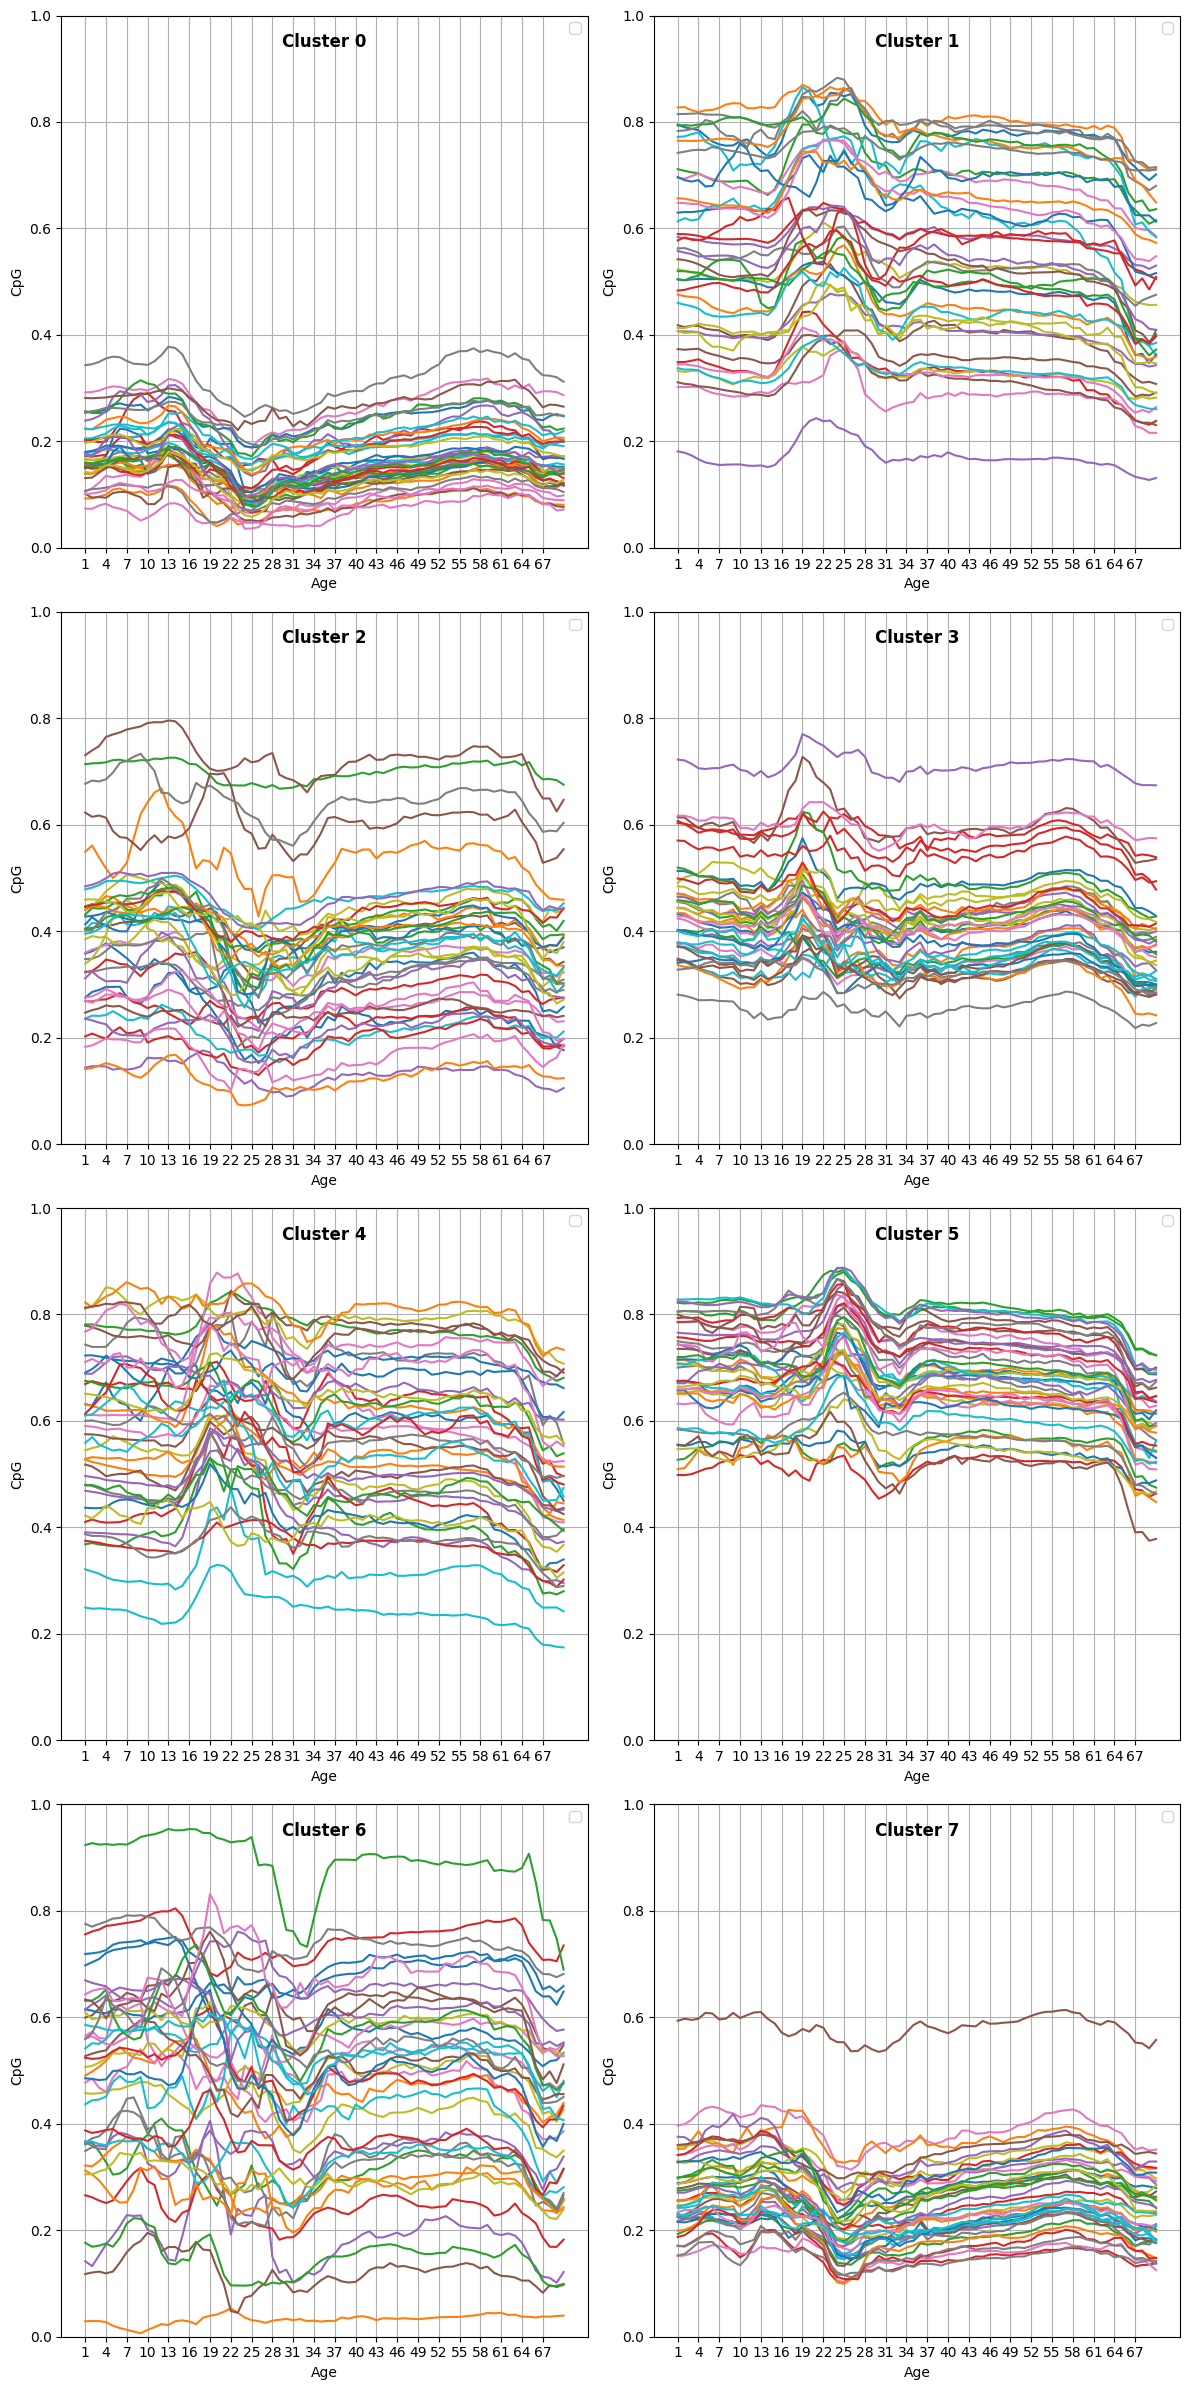

In [29]:
df_mean_for_statistics = mean_window_df.T
df_mean_for_statistics['cluster'] = cluster_labels_gmm
plot_top_trends_for_each_cluster(df_mean_for_statistics, mean_window_df)

<Axes: xlabel='24', ylabel='cluster'>

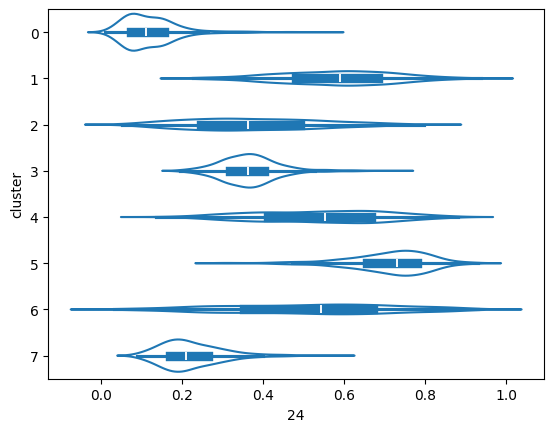

In [32]:
df_mean_for_statistics['cluster'] = df_mean_for_statistics['cluster'].astype('category')
sns.violinplot(data=df_mean_for_statistics, x=24, y="cluster", fill=False)

In [33]:
cluster_labels_gmm

array([0, 0, 0, ..., 6, 4, 4])

In [34]:
x_for_pca['clusters'] = cluster_labels_gmm

In [35]:
# clustering_results = x_for_pca[['clusters']]
# clustering_results.to_csv('PBMC_GM_clustering_results.csv')